## Trip History Data

Each quarter, we publish downloadable files of Capital Bikeshare trip data. The data includes:

* Duration – Duration of trip
* Start Date – Includes start date and time
* End Date – Includes end date and time
* Start Station – Includes starting station name and number
* End Station – Includes ending station name and number
* Bike Number – Includes ID number of bike used for the trip
* Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations at our warehouses and any trips lasting less than 60 seconds (potentially false starts or users trying to re-dock a bike to ensure it's secure).

### NOTE ---- 

   * THIS DATA IS OF YEAR 2010

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle

In [2]:
df = pd.read_csv("E:/Kaggle Datasets/bike_data/bike_data.csv")

##### EXPLORING DATA

In [3]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115597 entries, 0 to 115596
Data columns (total 9 columns):
Duration                115597 non-null int64
Start date              115597 non-null object
End date                115597 non-null object
Start station number    115597 non-null int64
Start station           115597 non-null object
End station number      115597 non-null int64
End station             115597 non-null object
Bike number             115597 non-null object
Member type             115597 non-null object
dtypes: int64(3), object(6)
memory usage: 7.9+ MB


In [5]:
df.shape

(115597, 9)

In [6]:
df['Member type'].unique()

array(['Member', 'Casual', 'Unknown'], dtype=object)

In [7]:
df["Member type"].value_counts()

Member     91586
Casual     24001
Unknown       10
Name: Member type, dtype: int64

###### CHECKING FOR NULL VALUES

In [8]:
df.isnull().mean()

Duration                0.0
Start date              0.0
End date                0.0
Start station number    0.0
Start station           0.0
End station number      0.0
End station             0.0
Bike number             0.0
Member type             0.0
dtype: float64

## FEATURE ENGINEERING (FOR ANALYSIS)

In [9]:
df['Start date'].head(10)

0    2010-09-20 11:27:04
1    2010-09-20 11:41:22
2    2010-09-20 12:05:37
3    2010-09-20 12:06:05
4    2010-09-20 12:10:43
5    2010-09-20 12:14:27
6    2010-09-20 12:15:26
7    2010-09-20 12:16:36
8    2010-09-20 12:18:38
9    2010-09-20 12:19:46
Name: Start date, dtype: object

In [10]:
df['End date'].head(10)

0    2010-09-20 11:43:56
1    2010-09-20 11:42:23
2    2010-09-20 12:50:27
3    2010-09-20 12:29:32
4    2010-09-20 12:34:17
5    2010-09-20 12:30:50
6    2010-09-20 12:30:56
7    2010-09-20 12:44:15
8    2010-09-20 13:00:15
9    2010-09-20 12:44:34
Name: End date, dtype: object

#### FILTERING DATE TO DATE AND TIME

In [9]:
def filter_date(df,feature):
    global date
    global time
    date = []
    time = []
    for i in df[feature]:
        x = i.split(" ")
        date.append(x[0])
        time.append(x[1])

In [10]:
filter_date(df,'Start date')

In [11]:
date[0:5]

['2010-09-20', '2010-09-20', '2010-09-20', '2010-09-20', '2010-09-20']

In [12]:
time[0:5]

['11:27:04', '11:41:22', '12:05:37', '12:06:05', '12:10:43']

In [13]:
df['Start_Date'] = date

In [14]:
df['Start_Time'] = time

In [15]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Date,Start_Time
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,2010-09-20,11:27:04
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,2010-09-20,11:41:22
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,2010-09-20,12:05:37
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,2010-09-20,12:06:05
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,2010-09-20,12:10:43


In [16]:
filter_date(df,"End date")

In [17]:
date[0:5]

['2010-09-20', '2010-09-20', '2010-09-20', '2010-09-20', '2010-09-20']

In [18]:
time[0:5]

['11:43:56', '11:42:23', '12:50:27', '12:29:32', '12:34:17']

In [19]:
df['End_Date'] = date

In [20]:
df['End_Time'] = time

In [21]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Date,Start_Time,End_Date,End_Time
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,2010-09-20,11:27:04,2010-09-20,11:43:56
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,2010-09-20,11:41:22,2010-09-20,11:42:23
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,2010-09-20,12:05:37,2010-09-20,12:50:27
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,2010-09-20,12:06:05,2010-09-20,12:29:32
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,2010-09-20,12:10:43,2010-09-20,12:34:17


In [22]:
df.drop(columns=['Start date','End date'],axis=1,inplace=True)

In [23]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Date,Start_Time,End_Date,End_Time
0,1012,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,2010-09-20,11:27:04,2010-09-20,11:43:56
1,61,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,2010-09-20,11:41:22,2010-09-20,11:42:23
2,2690,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,2010-09-20,12:05:37,2010-09-20,12:50:27
3,1406,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,2010-09-20,12:06:05,2010-09-20,12:29:32
4,1413,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,2010-09-20,12:10:43,2010-09-20,12:34:17


#### FILTERING DATE FEATURE TO DAY AND MONTH

In [24]:
def filter_more_date(df,feature):
    global date
    global month
    month = []
    date = []
    for i in df[feature]:
        x = i.split('-')
        month.append(x[1])
        date.append(x[-1])

In [25]:
filter_more_date(df,"Start_Date")

In [26]:
df['Start_Month'] = month
df['Start_Day'] = date

In [27]:
filter_more_date(df,"End_Date")

In [28]:
df['End_Month'] = month
df["End_Day"] = date

In [29]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Date,Start_Time,End_Date,End_Time,Start_Month,Start_Day,End_Month,End_Day
0,1012,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,2010-09-20,11:27:04,2010-09-20,11:43:56,09,20,09,20
1,61,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,2010-09-20,11:41:22,2010-09-20,11:42:23,09,20,09,20
2,2690,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,2010-09-20,12:05:37,2010-09-20,12:50:27,09,20,09,20
3,1406,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,2010-09-20,12:06:05,2010-09-20,12:29:32,09,20,09,20
4,1413,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,2010-09-20,12:10:43,2010-09-20,12:34:17,09,20,09,20


In [30]:
df.drop(columns=["Start_Date","End_Date"],axis=1,inplace=True)

In [31]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Time,End_Time,Start_Month,Start_Day,End_Month,End_Day
0,1012,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,11:27:04,11:43:56,09,20,09,20
1,61,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,11:41:22,11:42:23,09,20,09,20
2,2690,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,12:05:37,12:50:27,09,20,09,20
3,1406,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,12:06:05,12:29:32,09,20,09,20
4,1413,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,12:10:43,12:34:17,09,20,09,20


#### FILTERING TIME COLUMN TO HOURS & MINUTES

In [32]:
def filter_time(df,feature):
    global hour
    global mins
    hour = []
    mins = []
    for i in df[feature]:
        x = i.split(":")
        hour.append(x[0])
        mins.append(x[1])

In [33]:
filter_time(df,"Start_Time")

In [34]:
hour[0:10]

['11', '11', '12', '12', '12', '12', '12', '12', '12', '12']

In [35]:
mins[0:5]

['27', '41', '05', '06', '10']

In [36]:
df["Start_Hour"] = hour
df['Start_Minute'] = mins 

In [37]:
filter_time(df,"End_Time")

In [38]:
hour[0:5]

['11', '11', '12', '12', '12']

In [39]:
mins[0:5]

['43', '42', '50', '29', '34']

In [40]:
df["End_Hour"] = hour
df['End_Minute'] = mins 

In [41]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Time,End_Time,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,11:27:04,11:43:56,09,20,09,20,11,27,11,43
1,61,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,11:41:22,11:42:23,09,20,09,20,11,41,11,42
2,2690,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,12:05:37,12:50:27,09,20,09,20,12,05,12,50
3,1406,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,12:06:05,12:29:32,09,20,09,20,12,06,12,29
4,1413,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,12:10:43,12:34:17,09,20,09,20,12,10,12,34


In [42]:
df.drop(columns=['Start_Time',"End_Time"],axis=1,inplace=True)

In [43]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,09,20,09,20,11,27,11,43
1,61,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,09,20,09,20,11,41,11,42
2,2690,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,09,20,09,20,12,05,12,50
3,1406,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,09,20,09,20,12,06,12,29
4,1413,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,09,20,09,20,12,10,12,34


##### FILTERING START STATION 

In [44]:
df['Start station'].head(20)

0          M St & New Jersey Ave SE
1                    1st & N St  SE
2                     5th & K St NW
3                     5th & K St NW
4     19th St & Pennsylvania Ave NW
5                     7th & T St NW
6                     7th & T St NW
7                    10th & U St NW
8                     5th & K St NW
9          Minnesota Ave Metro/DOES
10                    4th & W St NE
11                    1st & M St NE
12          Park Rd & Holmead Pl NW
13             14th & Harvard St NW
14                   14th & V St NW
15             16th & Harvard St NW
16             14th & Harvard St NW
17               19th & E Street NW
18                20th & Crystal Dr
19                   21st & I St NW
Name: Start station, dtype: object

In [45]:
df['Start station'].tail(20)

115577                                 14th & Harvard St NW
115578    Eastern Market Metro / Pennsylvania Ave & 7th ...
115579    Eastern Market Metro / Pennsylvania Ave & 7th ...
115580                                        7th & T St NW
115581                              Lamont & Mt Pleasant NW
115582                                Florida Ave & R St NW
115583                       Georgia Ave and Fairmont St NW
115584                                       14th & V St NW
115585                                Florida Ave & R St NW
115586                                17th & Corcoran St NW
115587                             20th St & Florida Ave NW
115588                                  11th & Kenyon St NW
115589                             20th St & Florida Ave NW
115590                              Lamont & Mt Pleasant NW
115591                              Lamont & Mt Pleasant NW
115592                             20th St & Florida Ave NW
115593                             Calve

In [46]:
def filter_address(df,feature):
    global address
    address = []
    for i in df[feature]:
        if "&" in i:
            x = i.split("&")
            address.append(x[1])
        else:
            x = i.split("/")
            address.append(x[0])

In [47]:
filter_address(df,'Start station')

In [48]:
address[:5]

[' New Jersey Ave SE',
 ' N St  SE',
 ' K St NW',
 ' K St NW',
 ' Pennsylvania Ave NW']

In [49]:
df['Start station'] = address

##### FILTERING END STATION 

In [50]:
filter_address(df,"End station")

In [51]:
address[:5]

[' M St SW', ' N St  SE', ' Pennsylvania Ave NW', ' Holmead Pl NW', ' P St NW']

In [52]:
df['End station'] = address

In [53]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,New Jersey Ave SE,31108,M St SW,W00742,Member,09,20,09,20,11,27,11,43
1,61,31209,N St SE,31209,N St SE,W00032,Member,09,20,09,20,11,41,11,42
2,2690,31600,K St NW,31100,Pennsylvania Ave NW,W00993,Member,09,20,09,20,12,05,12,50
3,1406,31600,K St NW,31602,Holmead Pl NW,W00344,Member,09,20,09,20,12,06,12,29
4,1413,31100,Pennsylvania Ave NW,31201,P St NW,W00883,Member,09,20,09,20,12,10,12,34


## EXPLORATORY DATA ANALYSIS

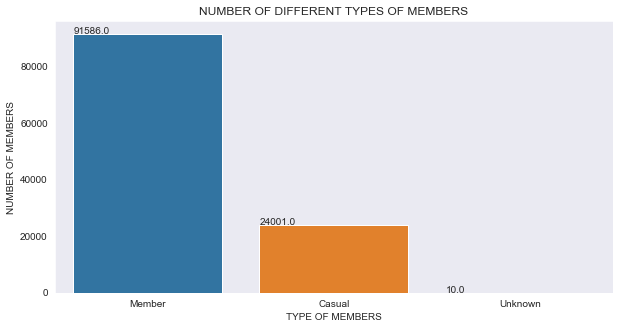

In [54]:
plt.figure(figsize=(10,5))
sns.set_style("dark")
ax = sns.countplot(df['Member type'])
plt.title("NUMBER OF DIFFERENT TYPES OF MEMBERS")
plt.xlabel("TYPE OF MEMBERS")
plt.ylabel("NUMBER OF MEMBERS")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+10))
    
plt.show()

<b>OBSERVATION</b>

* THERE ARE MORE MEMBER BOOKINGS THAN CASUAL AND UNKOWN

In [55]:
m = df.groupby("Member type").median()
m

,Duration,Start station number,End station number
Member type,,,
Casual,1523.0,31217.0,31217.0
Member,580.0,31213.0,31213.0
Unknown,365.5,31219.5,31202.0


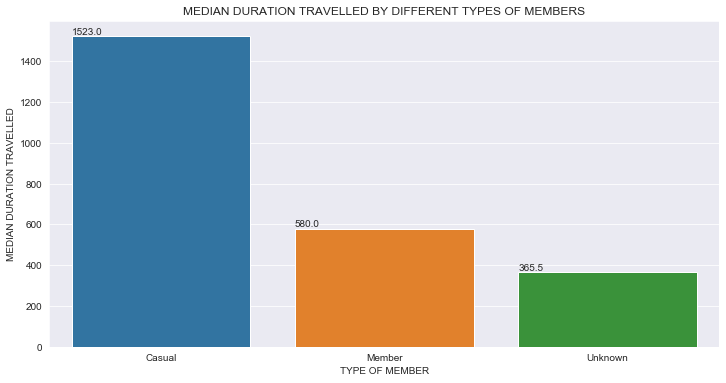

In [56]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
ax = sns.barplot(m.index,m.Duration)
plt.title("MEDIAN DURATION TRAVELLED BY DIFFERENT TYPES OF MEMBERS")
plt.xlabel("TYPE OF MEMBER")
plt.ylabel("MEDIAN DURATION TRAVELLED")


for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+10))
    
plt.show()


<b>OBSERVATION --- </b>

* CASUAL TRIPS HAVE THE LONGEST DURATION OF TRAVELLING FOLLOWED BY MEMBER GROUP AND UNKNOWN GROUP

In [57]:
m = df.groupby("Start_Hour").median()

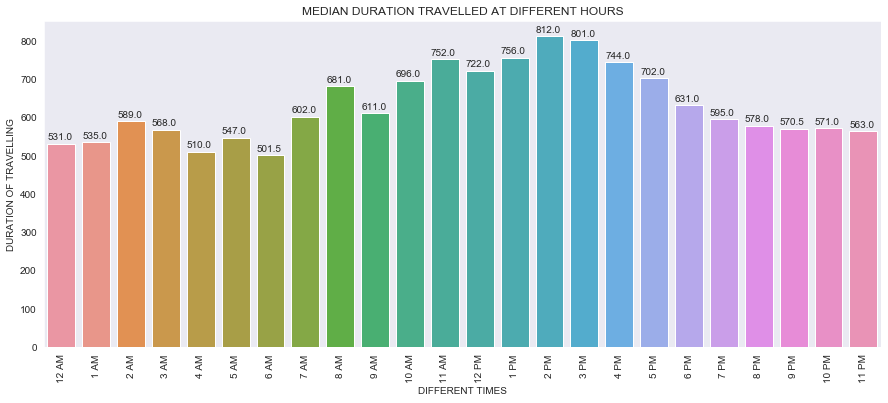

In [58]:
plt.figure(figsize=(15,6))
ticks = ["12 AM","1 AM","2 AM","3 AM","4 AM","5 AM","6 AM","7 AM","8 AM","9 AM","10 AM","11 AM","12 PM","1 PM","2 PM","3 PM","4 PM","5 PM","6 PM","7 PM","8 PM","9 PM","10 PM","11 PM"]
sns.set_style("dark")
ax = sns.barplot(m.index,m.Duration)
ax.set_xticklabels(labels=ticks,rotation=90)
plt.title("MEDIAN DURATION TRAVELLED AT DIFFERENT HOURS")
plt.ylabel("DURATION OF TRAVELLING")
plt.xlabel("DIFFERENT TIMES")
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+10))
    
plt.show()

<B>OBSERVATION --- </B>


* HERE WE CAN SEE THAT PEOPLE TEND TO TRAVEL LESS NUMBER OF HOURS MID-NIGHT AND EARLY MORNING (12AM-6AM) & TRAVEL DURATION IS LONGER DURING THE EVENING AND AGAIN THE DURATION OF TRAVELLING FALLS DOWN AFTER 5PM 

In [59]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,New Jersey Ave SE,31108,M St SW,W00742,Member,09,20,09,20,11,27,11,43
1,61,31209,N St SE,31209,N St SE,W00032,Member,09,20,09,20,11,41,11,42
2,2690,31600,K St NW,31100,Pennsylvania Ave NW,W00993,Member,09,20,09,20,12,05,12,50
3,1406,31600,K St NW,31602,Holmead Pl NW,W00344,Member,09,20,09,20,12,06,12,29
4,1413,31100,Pennsylvania Ave NW,31201,P St NW,W00883,Member,09,20,09,20,12,10,12,34


In [62]:
df2 = df

#### CONVERTING NUMBERIC STRING COLUMNS TO INTGER NUMBERS

In [61]:
cols = ['Start_Month', 'Start_Day', 'End_Month', 'End_Day', 'Start_Hour',
       'Start_Minute', 'End_Hour', 'End_Minute']

In [62]:
for i in cols:
    df[i] = df[i].astype("int64")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115597 entries, 0 to 115596
Data columns (total 15 columns):
Duration                115597 non-null int64
Start station number    115597 non-null int64
Start station           115597 non-null object
End station number      115597 non-null int64
End station             115597 non-null object
Bike number             115597 non-null object
Member type             115597 non-null object
Start_Month             115597 non-null int64
Start_Day               115597 non-null int64
End_Month               115597 non-null int64
End_Day                 115597 non-null int64
Start_Hour              115597 non-null int64
Start_Minute            115597 non-null int64
End_Hour                115597 non-null int64
End_Minute              115597 non-null int64
dtypes: int64(11), object(4)
memory usage: 13.2+ MB


In [64]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,New Jersey Ave SE,31108,M St SW,W00742,Member,9,20,9,20,11,27,11,43
1,61,31209,N St SE,31209,N St SE,W00032,Member,9,20,9,20,11,41,11,42
2,2690,31600,K St NW,31100,Pennsylvania Ave NW,W00993,Member,9,20,9,20,12,5,12,50
3,1406,31600,K St NW,31602,Holmead Pl NW,W00344,Member,9,20,9,20,12,6,12,29
4,1413,31100,Pennsylvania Ave NW,31201,P St NW,W00883,Member,9,20,9,20,12,10,12,34


In [65]:
m = df.groupby(["Start_Month","Member type"]).median()

In [66]:
m

Duration  Start station number  End station number  \
Start_Month Member type                                                       
9           Casual         1496.0               31200.0             31201.0   
            Member          603.0               31200.0             31201.0   
10          Casual         1742.0               31214.0             31215.0   
            Member          633.0               31205.0             31206.0   
            Unknown        1163.0               31221.0             31104.0   
11          Casual         1443.0               31220.0             31219.0   
            Member          591.0               31214.0             31215.0   
            Unknown         348.0               31218.0             31204.0   
12          Casual         1091.5               31222.0             31221.0   
            Member          520.0               31214.0             31214.0   
            Unknown         407.5               31123.5             31122.0   

                         Start_Day  End_Month  End_Day  Start_Hour  \
Start_Month Member type                                              
9           Casual            25.0        9.0     25.0        15.0   
            Member            25.0        9.0     25.0        16.0   
10          Casual            20.0       10.0     20.0        14.0   
            Member            20.0       10.0     20.0        15.0   
            Unknown           28.0       10.0     28.0        14.0   
11          Casual            14.0       11.0     14.0        14.0   
            Member            15.0       11.0     15.0        15.0   
            Unknown           15.0       11.0     15.0         8.0   
12          Casual            16.0       12.0     16.0        14.0   
            Member            13.0       12.0     13.0        14.0   
            Unknown           18.0       12.0     18.0        16.5   

                         Start_Minute  End_Hour  End_Minute  
Start_Month Member type                                      
9           Casual               28.0      16.0        28.0  
            Member               30.0      16.0        29.0  
10          Casual               30.0      15.0        30.0  
            Member               29.0      15.0        30.0  
            Unknown              32.0      14.0        35.0  
11          Casual               29.0      15.0        30.0  
            Member               30.0      15.0        30.0  
            Unknown              52.0       9.0        48.0  
12          Casual               31.0      15.0        29.5  
            Member               30.0      14.0        30.0  
            Unknown              18.0      16.5        24.5

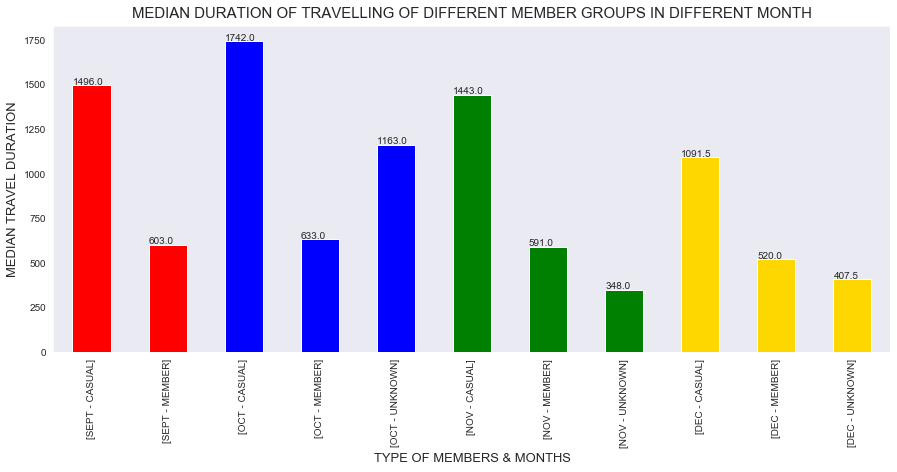

In [67]:
labels = ["[SEPT - CASUAL]",'[SEPT - MEMBER]','[OCT - CASUAL]','[OCT - MEMBER]','[OCT - UNKNOWN]','[NOV - CASUAL]','[NOV - MEMBER]',"[NOV - UNKNOWN]","[DEC - CASUAL]","[DEC - MEMBER]","[DEC - UNKNOWN]"]

plt.figure(figsize=(15,6))
plt.title("MEDIAN DURATION OF TRAVELLING OF DIFFERENT MEMBER GROUPS IN DIFFERENT MONTH",fontdict={"fontsize":15,'fontweight':50},pad=8)
ax = m['Duration'].plot(kind='bar',color=['red','red','blue','blue','blue','green','green','green','gold','gold','gold'])
plt.xlabel("TYPE OF MEMBERS & MONTHS",fontdict = {"fontsize":13,'fontweight':20},labelpad=5)
plt.ylabel("MEDIAN TRAVEL DURATION",fontdict = {"fontsize":13,'fontweight':20},labelpad=5)
ax.set_xticklabels(labels=labels)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+5))

plt.show()

<b>OBSERVATION --- </b>

* OCTOBER MONTH HAD TRAVELLING OF LONGEST DURATION FOR ALL MEMBER TYPE AS COMPARED TO OTHER MONTHS & DECEMBER HAS THE SHORTEST DURATION OF TRAVELLING FOR ALL MEMBER TYPES

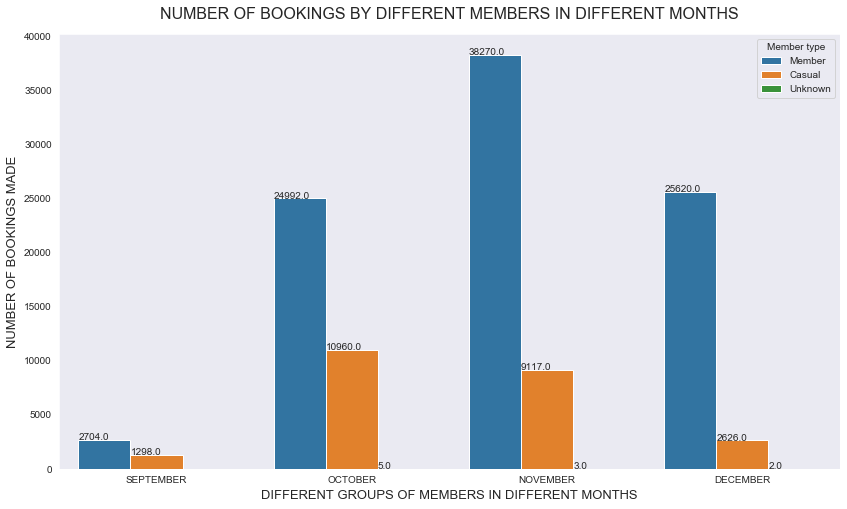

In [70]:
plt.figure(figsize=(14,8))
plt.title("NUMBER OF BOOKINGS BY DIFFERENT MEMBERS IN DIFFERENT MONTHS",fontdict = {"fontsize":16,'fontweight':20},pad=15)
ax = sns.countplot(df['Start_Month'],hue=df['Member type'])
plt.xlabel("DIFFERENT GROUPS OF MEMBERS IN DIFFERENT MONTHS",fontdict = {"fontsize":13,'fontweight':20},labelpad=5)
plt.ylabel("NUMBER OF BOOKINGS MADE",fontdict = {"fontsize":13,'fontweight':20},labelpad=5)
ax.set_xticklabels(labels=["SEPTEMBER",'OCTOBER','NOVEMBER','DECEMBER'])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

In [71]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,New Jersey Ave SE,31108,M St SW,W00742,Member,9,20,9,20,11,27,11,43
1,61,31209,N St SE,31209,N St SE,W00032,Member,9,20,9,20,11,41,11,42
2,2690,31600,K St NW,31100,Pennsylvania Ave NW,W00993,Member,9,20,9,20,12,5,12,50
3,1406,31600,K St NW,31602,Holmead Pl NW,W00344,Member,9,20,9,20,12,6,12,29
4,1413,31100,Pennsylvania Ave NW,31201,P St NW,W00883,Member,9,20,9,20,12,10,12,34


In [74]:
m = df['Start station'].value_counts().head(10)
m

 Dupont Circle NW    5093
 M St NW             4875
 Harvard St NW       4598
 Columbia Rd NW      4160
 K St NW             4075
 P St NW             3749
 V St NW             3667
 H St NW             3454
 R St NW             3202
 T St NW             3177
Name: Start station, dtype: int64

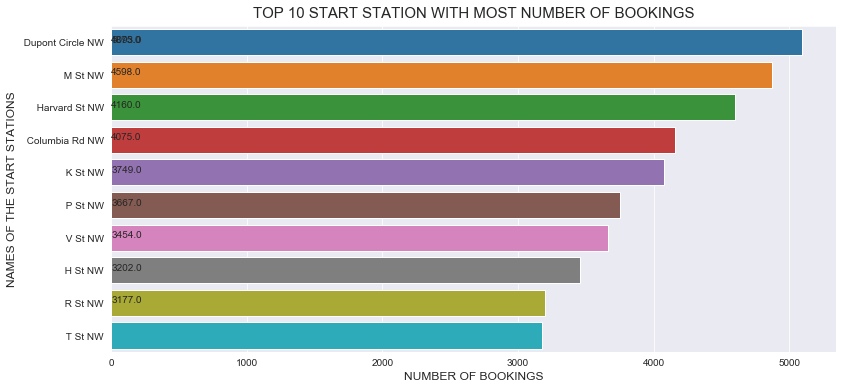

In [79]:
plt.figure(figsize=(13,6))
sns.set_style("darkgrid")
ax = sns.barplot(m.values,m.index)
plt.title("TOP 10 START STATION WITH MOST NUMBER OF BOOKINGS",fontdict={"fontsize":15,"fontweight":20},pad=8)
plt.ylabel("NAMES OF THE START STATIONS",fontdict={"fontsize":12,'fontweight':20})
plt.xlabel("NUMBER OF BOOKINGS",fontdict={"fontsize":12,'fontweight':20})

for p in ax.patches:
    x = int(p.get_x())
    y = int(p.get_y())
    
    label = p.get_width()
    ax.text(x,y,label)
    
plt.show()

In [74]:
m = df['Start station'].value_counts().tail(10)
m

 Newton St NE             124
 Monroe St NE             106
 MLK Ave SE                65
 Minnesota Ave SE          47
Anacostia Metro            33
 Naylor Rd SE              21
Minnesota Ave Metro        14
Anacostia Library          11
Benning Branch Library      6
 Minnesota Ave NE           4
Name: Start station, dtype: int64

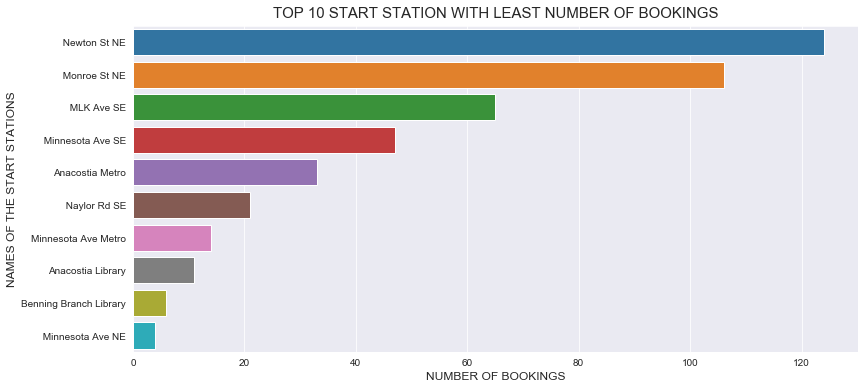

In [75]:
plt.figure(figsize=(13,6))
ax = sns.barplot(m.values,m.index)
plt.title("TOP 10 START STATION WITH LEAST NUMBER OF BOOKINGS",fontdict={"fontsize":15,"fontweight":12},pad=8)
plt.ylabel("NAMES OF THE START STATIONS",fontdict={"fontsize":12,'fontweight':10})
plt.xlabel("NUMBER OF BOOKINGS",fontdict={"fontsize":12,'fontweight':10})

#for p in ax.patches:
 #   ax.annotate("{:.1f}".format(p.get_x()),(p.get_x(),p.get_height()))
    
plt.show()

In [80]:
m = df['End station'].value_counts()[:10]
m

 Dupont Circle NW    5603
 M St NW             5364
 K St NW             4476
 P St NW             4047
 H St NW             3933
 V St NW             3576
 Columbia Rd NW      3535
 Corcoran St NW      3303
 I St NW             3261
 Harvard St NW       3178
Name: End station, dtype: int64

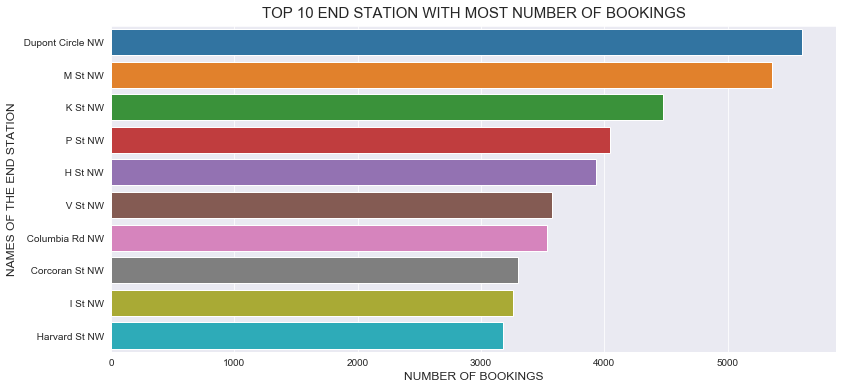

In [81]:
plt.figure(figsize=(13,6))
ax = sns.barplot(m.values,m.index)
plt.title("TOP 10 END STATION WITH MOST NUMBER OF BOOKINGS",fontdict={"fontsize":15,"fontweight":12},pad=8)
plt.ylabel("NAMES OF THE END STATION",fontdict={"fontsize":12,'fontweight':10})
plt.xlabel("NUMBER OF BOOKINGS",fontdict={"fontsize":12,'fontweight':10})

#for p in ax.patches:
 #   ax.annotate("{:.1f}".format(p.get_x()),(p.get_x(),p.get_height()))
    
plt.show()

In [82]:
m = df['End station'].value_counts().tail(10)
m

 Newton St NE             113
 Monroe St NE             102
 Minnesota Ave SE          59
Anacostia Metro            53
 MLK Ave SE                32
 Naylor Rd SE              19
Anacostia Library          14
Minnesota Ave Metro         7
 Minnesota Ave NE           6
Benning Branch Library      5
Name: End station, dtype: int64

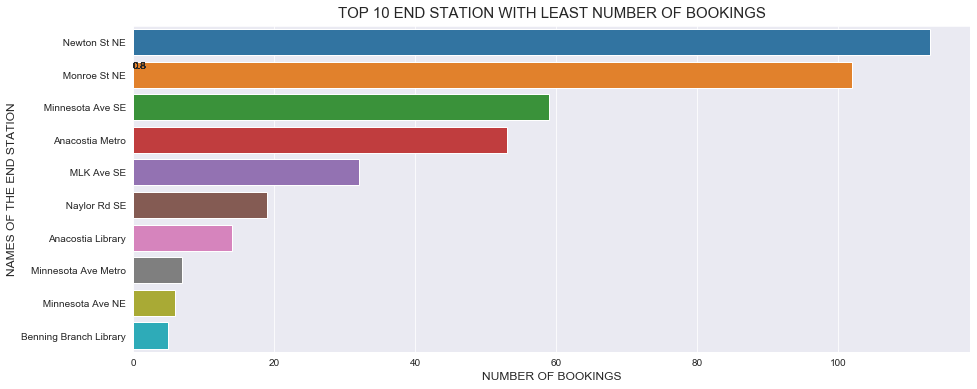

In [83]:
plt.figure(figsize=(15,6))
ax = sns.barplot(m.values,m.index)
plt.title("TOP 10 END STATION WITH LEAST NUMBER OF BOOKINGS",fontdict={"fontsize":15,"fontweight":12},pad=8)
plt.ylabel("NAMES OF THE END STATION",fontdict={"fontsize":12,'fontweight':10})
plt.xlabel("NUMBER OF BOOKINGS",fontdict={"fontsize":12,'fontweight':10})

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

In [84]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,New Jersey Ave SE,31108,M St SW,W00742,Member,9,20,9,20,11,27,11,43
1,61,31209,N St SE,31209,N St SE,W00032,Member,9,20,9,20,11,41,11,42
2,2690,31600,K St NW,31100,Pennsylvania Ave NW,W00993,Member,9,20,9,20,12,5,12,50
3,1406,31600,K St NW,31602,Holmead Pl NW,W00344,Member,9,20,9,20,12,6,12,29
4,1413,31100,Pennsylvania Ave NW,31201,P St NW,W00883,Member,9,20,9,20,12,10,12,34


## ENCODING FEATURES

In [84]:
mapp = {"Member":1,"Casual":0,"Unknown":2}

In [85]:
df['Member type'] = df['Member type'].map(mapp)

In [86]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,New Jersey Ave SE,31108,M St SW,W00742,1,9,20,9,20,11,27,11,43
1,61,31209,N St SE,31209,N St SE,W00032,1,9,20,9,20,11,41,11,42
2,2690,31600,K St NW,31100,Pennsylvania Ave NW,W00993,1,9,20,9,20,12,5,12,50
3,1406,31600,K St NW,31602,Holmead Pl NW,W00344,1,9,20,9,20,12,6,12,29
4,1413,31100,Pennsylvania Ave NW,31201,P St NW,W00883,1,9,20,9,20,12,10,12,34


In [87]:
df[df['Member type']==2]

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
15727,2477,31221,M St NW,31302,Newark St NW,W01070,2,10,15,10,15,13,24,14,5
23363,226,31011,Crystal Dr,31007,Bell St,W00438,2,10,21,10,21,17,41,17,45
32974,168,31011,Crystal Dr,31003,Crystal Dr,W00878,2,10,28,10,28,12,32,12,35
36829,1279,31620,F St NW,31229,T St NW,W00077,2,10,30,10,30,14,27,14,48
37137,1163,31620,F St NW,31104,Columbia Rd NW,W01080,2,10,30,10,30,15,40,16,0
53909,383,31218,C St SW,31219,Constitution Ave NW,W00648,2,11,10,11,10,8,52,8,58
64268,331,31235,Constitution Ave NW,31204,E St NW,W00844,2,11,15,11,15,8,56,9,1
70918,348,31201,P St NW,31200,Dupont Circle NW,W00565,2,11,19,11,19,12,42,12,48
102581,292,31011,Crystal Dr,31007,Bell St,W00278,2,12,14,12,14,17,1,17,6
109862,523,31236,O St NW / Georgetown University,31237,Pennsylvania Ave NW,W00805,2,12,22,12,22,16,35,16,43


In [88]:
df.drop(df[df['Member type']==2].index,inplace=True,axis=0)

In [89]:
df['Member type'].unique()

array([1, 0], dtype=int64)

#### ENCODING MOST FREQUENT CATEGORIES

In [90]:
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute
0,1012,31208,New Jersey Ave SE,31108,M St SW,W00742,1,9,20,9,20,11,27,11,43
1,61,31209,N St SE,31209,N St SE,W00032,1,9,20,9,20,11,41,11,42
2,2690,31600,K St NW,31100,Pennsylvania Ave NW,W00993,1,9,20,9,20,12,5,12,50
3,1406,31600,K St NW,31602,Holmead Pl NW,W00344,1,9,20,9,20,12,6,12,29
4,1413,31100,Pennsylvania Ave NW,31201,P St NW,W00883,1,9,20,9,20,12,10,12,34


##### ENCODING START STATION

In [91]:
df['Start station'].value_counts().head()

 Dupont Circle NW    5093
 M St NW             4874
 Harvard St NW       4598
 Columbia Rd NW      4160
 K St NW             4075
Name: Start station, dtype: int64

In [92]:
mapp = {" Dupont Circle NW":1," M St NW":1," Harvard St NW":1," Columbia Rd NW":1," K St NW":1}

In [93]:
df['Start station enc'] = df['Start station'].map(mapp)

In [94]:
df['Start station enc'].unique()

array([nan,  1.])

In [95]:
df['Start station enc'].fillna(0,inplace=True)

In [96]:
df.drop(columns=['Start station'],axis=1,inplace=True)

##### ENCODING END STATION

In [97]:
df['End station'].value_counts().head()

 Dupont Circle NW    5602
 M St NW             5364
 K St NW             4476
 P St NW             4047
 H St NW             3933
Name: End station, dtype: int64

In [98]:
mapp = {" Dupont Circle NW":1," M St NW":1," K St NW":1," H St NW":1," P St NW":1}

In [99]:
df['End station enc'] = df['End station'].map(mapp)

In [100]:
df['End station enc'].unique()

array([nan,  1.])

In [101]:
df["End station enc"].fillna(0,inplace=True)

In [102]:
df.drop(columns=['End station'],axis=1,inplace=True)

In [103]:
df.head()

,Duration,Start station number,End station number,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute,Start station enc,End station enc
0,1012,31208,31108,W00742,1,9,20,9,20,11,27,11,43,0.0,0.0
1,61,31209,31209,W00032,1,9,20,9,20,11,41,11,42,0.0,0.0
2,2690,31600,31100,W00993,1,9,20,9,20,12,5,12,50,1.0,0.0
3,1406,31600,31602,W00344,1,9,20,9,20,12,6,12,29,1.0,0.0
4,1413,31100,31201,W00883,1,9,20,9,20,12,10,12,34,0.0,1.0


#### ENCODING START STATION NUMBER

In [104]:
m = df['Start station number'].value_counts().head()
m

31200    5093
31104    4160
31201    3748
31101    3667
31214    3145
Name: Start station number, dtype: int64

In [105]:
df['Start station number'] = df['Start station number'].astype("int64")

In [106]:
mapp = {31200:1,31104:1,31201:1,31101:1,31214:1}

df['Start_Station_No'] = df['Start station number'].map(mapp)

In [107]:
df.Start_Station_No.unique()

array([nan,  1.])

In [108]:
df.fillna(0,inplace=True)

In [109]:
df.drop("Start station number",axis=1,inplace=True)

In [110]:
df.head()

,Duration,End station number,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute,Start station enc,End station enc,Start_Station_No
0,1012,31108,W00742,1,9,20,9,20,11,27,11,43,0.0,0.0,0.0
1,61,31209,W00032,1,9,20,9,20,11,41,11,42,0.0,0.0,0.0
2,2690,31100,W00993,1,9,20,9,20,12,5,12,50,1.0,0.0,0.0
3,1406,31602,W00344,1,9,20,9,20,12,6,12,29,1.0,0.0,0.0
4,1413,31201,W00883,1,9,20,9,20,12,10,12,34,0.0,1.0,0.0


##### ENCODING END STATION NUMBER

In [111]:
m = df['End station number'].value_counts().head()
m

31200    5602
31201    4047
31101    3576
31104    3534
31214    3303
Name: End station number, dtype: int64

In [112]:
df['End station number'] = df['End station number'].astype("int64")

In [113]:
mapp = {31200:1,31104:1,31201:1,31101:1,31214:1}

df['End_Station_No'] = df['End station number'].map(mapp)

In [114]:
df.End_Station_No.unique()

array([nan,  1.])

In [115]:
df['End_Station_No'].fillna(0,inplace=True)

In [116]:
df.drop("End station number",axis=1,inplace=True)

In [117]:
df.head()

,Duration,Bike number,Member type,Start_Month,Start_Day,End_Month,End_Day,Start_Hour,Start_Minute,End_Hour,End_Minute,Start station enc,End station enc,Start_Station_No,End_Station_No
0,1012,W00742,1,9,20,9,20,11,27,11,43,0.0,0.0,0.0,0.0
1,61,W00032,1,9,20,9,20,11,41,11,42,0.0,0.0,0.0,0.0
2,2690,W00993,1,9,20,9,20,12,5,12,50,1.0,0.0,0.0,0.0
3,1406,W00344,1,9,20,9,20,12,6,12,29,1.0,0.0,0.0,0.0
4,1413,W00883,1,9,20,9,20,12,10,12,34,0.0,1.0,0.0,1.0


In [118]:
df.drop(columns=['Bike number'],axis=1,inplace=True)

### FEATURE SELECTION TABLE

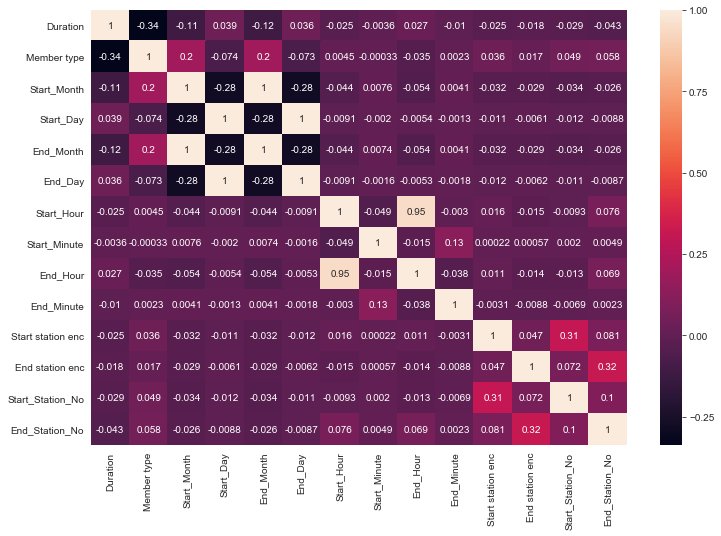

In [119]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [120]:
from sklearn.ensemble import ExtraTreesRegressor

In [121]:
Y = df['Member type']
X = df.drop(columns=['Member type'],axis=1,inplace=False)

In [122]:
model = ExtraTreesRegressor()

In [123]:
model.fit(X,Y)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [124]:
print(model.feature_importances_)

[0.39459937 0.03405603 0.07738505 0.00772494 0.07430539 0.06758188
 0.10449901 0.06488335 0.10558833 0.02081412 0.0199373  0.01548935
 0.01313589]


In [125]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns)

In [126]:
### MOST IMP FEATURES

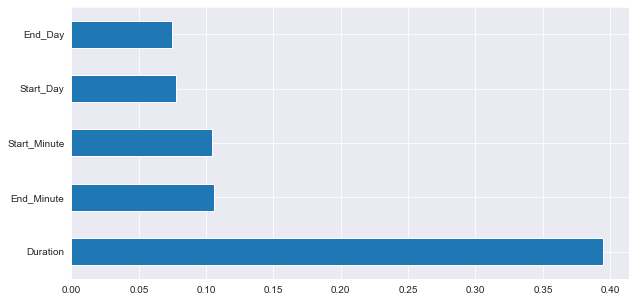

In [127]:
plt.figure(figsize=(10,5))
feature_imp.nlargest(5).plot(kind="barh")
plt.show()

In [128]:
### Least IMP FEATURES

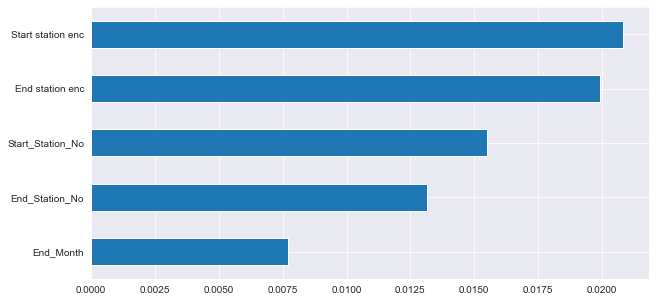

In [129]:
plt.figure(figsize=(10,5))
feature_imp.nsmallest(5).plot(kind="barh")
plt.show()

In [130]:
df.drop(columns=["End_Day","End_Hour","End_Month"],axis=1,inplace=True)

#### BALANCING OUT DATASET

* BEFORE UPSAMPLING RECALL --- > 98
* AFTER UPSAMPLING RECALL --- > 

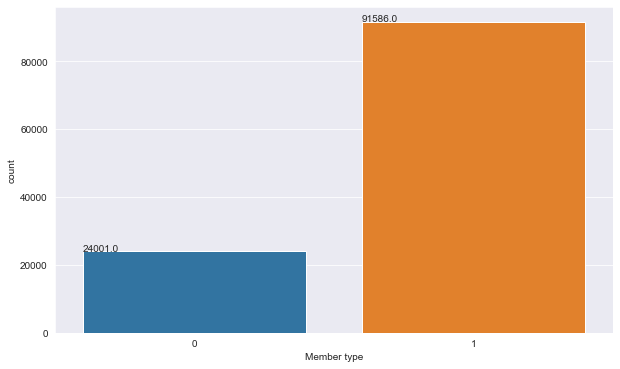

In [131]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
ax = sns.countplot(df['Member type'])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100))

plt.show()


In [132]:
from sklearn.utils import resample

In [133]:
df_major = df[df['Member type']==1]
df_minor = df[df["Member type"]==0]

df_minor_upsampled = resample(df_minor,replace=True,n_samples=91586,random_state=233)

df_upsampled = pd.concat([df_major,df_minor_upsampled])

In [134]:
df_upsampled.head()

,Duration,Member type,Start_Month,Start_Day,Start_Hour,Start_Minute,End_Minute,Start station enc,End station enc,Start_Station_No,End_Station_No
0,1012,1,9,20,11,27,43,0.0,0.0,0.0,0.0
1,61,1,9,20,11,41,42,0.0,0.0,0.0,0.0
2,2690,1,9,20,12,5,50,1.0,0.0,0.0,0.0
3,1406,1,9,20,12,6,29,1.0,0.0,0.0,0.0
4,1413,1,9,20,12,10,34,0.0,1.0,0.0,1.0


## MODELLING

###### LOGISTIC REGRESSION

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,auc,recall_score,f1_score,roc_curve,confusion_matrix,roc_auc_score

In [136]:
Y = df_upsampled['Member type']
X = df_upsampled.drop(columns=['Member type'],axis=1,inplace=False)

In [137]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)

In [138]:
log_r = LogisticRegression()

In [139]:
log_r.fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
log_r.score(X_train,Y_train)

0.7428021591816402

In [141]:
log_r.score(X_test,Y_test)

0.7388562849733861

In [142]:
pred = log_r.predict(X_test)

In [143]:
roc_auc_score(Y_test,pred)

0.7396334356169876

In [144]:
print("Precision Score ---> ",precision_score(Y_test,pred))
print("Accuracy Score ---> ",accuracy_score(Y_test,pred))
print("Recall Score ---> ",recall_score(Y_test,pred))
print("F-1 Score ---> ",f1_score(Y_test,pred))



Precision Score --->  0.6858715280763609
Accuracy Score --->  0.7388562849733861
Recall Score --->  0.8758579036951628
F-1 Score --->  0.7693086735309012


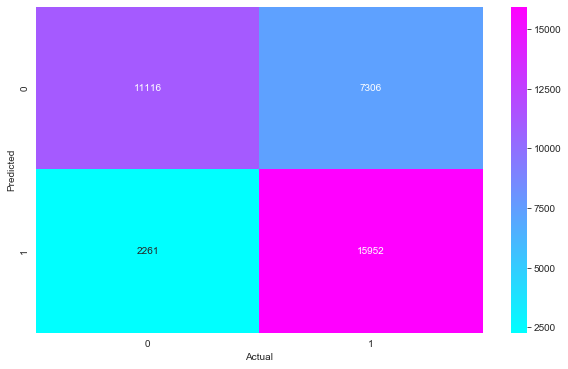

In [145]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,pred),annot=True,fmt='d',cmap='cool')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### RANDOM FOREST CLASSIFIER

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rfc = RandomForestClassifier()

###### HYPER PARAMETER TUNING

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
# NUMBER OF ESTIMATORS(TREES)
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# MAX DEPT OF THE CLASSSIFIER
max_dept = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
# MINIMUM SAMPLE SPLIT OF THE TREE
min_sample_split = [int(x) for x in np.linspace(start=1000,stop=10000,num=10)]
# MAX FEATURES
max_features = ['auto','sqrt']

In [158]:
params = { "n_estimators":n_estimators,
           "max_depth":max_dept,
           "min_samples_split":min_sample_split,
          "max_features":max_features
}

In [159]:
random_search = RandomizedSearchCV(estimator=rfc,param_distributions=params,cv=5,n_jobs=1,verbose=2,n_iter=10)

In [160]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20, total= 3.2min
[CV] n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20, total= 2.6min
[CV] n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20, total= 2.9min
[CV] n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20, total= 2.7min
[CV] n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=4000, max_features=sqrt, max_depth=20, total= 2.4min
[CV] n_estimators=700, min_samples_split=8000, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=8000, max_features=sqrt, max_depth=10, total= 2.0min
[CV] n_estimators=700, min_samples_split=8000, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=8000, max_features=sqrt, max_depth=10, total= 2.3min
[CV] n_estimators=700, min_sam

[CV]  n_estimators=600, min_samples_split=4000, max_features=sqrt, max_depth=5, total= 2.4min


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 113.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [162]:
random_search.best_params_

{'n_estimators': 700,
 'min_samples_split': 4000,
 'max_features': 'sqrt',
 'max_depth': 20}

In [366]:
del rfc

In [148]:
rfc = RandomForestClassifier(n_estimators=700,min_samples_split=4000,max_features='sqrt',max_depth=20)

In [ ]:
rfc.fit(X_train,Y_train)

In [ ]:
rfc.score(X_train,Y_train)

In [ ]:
rfc.score(X_test,Y_test)

In [ ]:
pred1 = rfc.predict(X_test)

In [ ]:
roc_auc_score(Y_test,pred1)

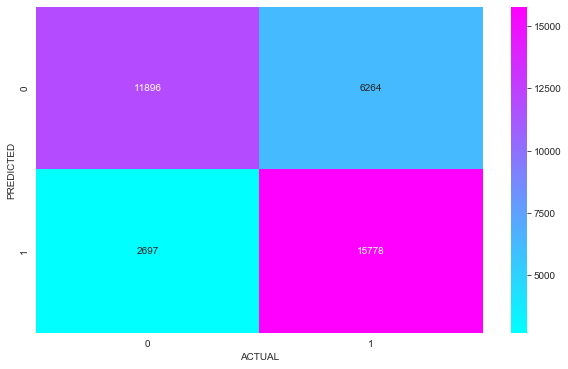

In [171]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,pred1),annot=True,fmt='d',cmap='cool')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.show()

In [172]:
print("PRECISION : ",precision_score(Y_test,pred1))
print("ACCURACY : ",accuracy_score(Y_test,pred1))
print("RECALL : ",recall_score(Y_test,pred1))
print("F1 SCORE : ",f1_score(Y_test,pred1))

PRECISION :  0.7158152617729788
ACCURACY :  0.7553978435921933
RECALL :  0.8540189445196211
F1 SCORE :  0.7788335760298145


#### XG-BOOST

In [174]:
import xgboost as xgb

In [186]:
xgb_model = xgb.XGBClassifier()

In [187]:
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
xgb_model.score(X_train,Y_train)

0.8108532316070344

In [191]:
xgb_model.score(X_test,Y_test)

0.7957690732905691

In [192]:
pred2 = xgb_model.predict(X_test)

In [193]:
print("Precision Score ---> ",precision_score(Y_test,pred2))
print("Accuracy Score ---> ",accuracy_score(Y_test,pred2))
print("Recall Score ---> ",recall_score(Y_test,pred2))
print("F-1 Score ---> ",f1_score(Y_test,pred2))

Precision Score --->  0.7769157136379666
Accuracy Score --->  0.7957690732905691
Recall Score --->  0.8346955345060894
F-1 Score --->  0.8047698570086631


###### Hyper-Parameter Tuning

In [1]:
from sklearn.model_selection import RandomizedSearchCV

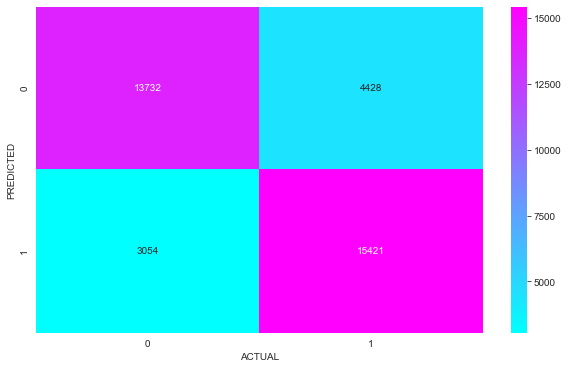

In [194]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,pred2),annot=True,fmt='d',cmap='cool')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.show()

##### COMPARASION OF RESULTS OF ALL MODELS

In [195]:
print("FOR LOGISTIC REGRESSION --- \n\n")
print("Precision Score ---> ",precision_score(Y_test,pred))
print("Accuracy Score ---> ",accuracy_score(Y_test,pred))
print("Recall Score ---> ",recall_score(Y_test,pred))
print("F-1 Score ---> ",f1_score(Y_test,pred))

print("\n\n\n FOR RANDOMFOREST REGRESSOR --- \n\n")
print("PRECISION : ",precision_score(Y_test,pred1))
print("ACCURACY : ",accuracy_score(Y_test,pred1))
print("RECALL : ",recall_score(Y_test,pred1))
print("F1 SCORE : ",f1_score(Y_test,pred1))

print("\n\n\n FOR XG-BOOST --- \n\n")
print("Precision Score ---> ",precision_score(Y_test,pred2))
print("Accuracy Score ---> ",accuracy_score(Y_test,pred2))
print("Recall Score ---> ",recall_score(Y_test,pred2))
print("F-1 Score ---> ",f1_score(Y_test,pred2))

FOR LOGISTIC REGRESSION --- 


Precision Score --->  0.6940660851630645
Accuracy Score --->  0.7422683226422819
Recall Score --->  0.8743166441136672
F-1 Score --->  0.7738334770527929



 FOR RANDOMFOREST REGRESSOR --- 


PRECISION :  0.7158152617729788
ACCURACY :  0.7553978435921933
RECALL :  0.8540189445196211
F1 SCORE :  0.7788335760298145



 FOR XG-BOOST --- 


Precision Score --->  0.7769157136379666
Accuracy Score --->  0.7957690732905691
Recall Score --->  0.8346955345060894
F-1 Score --->  0.8047698570086631
